# Explanatory Data Analysis (EDA) Pipeline for a financial investment firm


### 1. Business Context
Our company a financial investment firm specializing in long-term equity investments. The firm is analyzing Adani Port and SEZ (BSE: 532921), one of India's largest port operators and logistics companies, to evaluate its stock performance and identify investment opportunities.
*   My role:
  
    As a data science consultant, my primary responsibility is to analyze the provided dataset and deliver actionable insights to the company.

*   Why this Analysis?
  
    The company wants to understand the stock's historical performance, identify trends, and assess risks to make informed investment decisions. Specifically, they are interested in:

      *   Long-term price trends and growth potential.

      *   Volatility and risk assessment.

      *   Seasonal patterns and market behavior.

      *   Key performance indicators (KPIs) such as trading volume and delivery percentage.

### 2. Objective

As a data science consultant, my objective is to:

*  **Analyze stock performance:** Identify long-term trends, seasonal patterns, and key drivers of Adani Port and SEZ's stock price.

*  **Assess risk and volatility:** Evaluate the stock's volatility and its reaction to market shocks (e.g., COVID-19) to guide risk management strategies.

*  **Provide actionable insights:** Deliver data-driven recommendations to optimize investment strategies and improve decision-making for the company.



### 3. Data Source
*   The data used in my project is public data from BSE and the data can be found through this 👉[link](https://www.bseindia.com/markets/equity/EQReports/StockPrcHistori.html?flag=0)

*   Just use the security name **ADANI PORTS AND SPECIAL ECONOMIC ZONE LTD** and the period to month "April-2015 to March-2025(As on 17/03/2025)".



### 4. Business Questions
As part of the assessment brief I am writing my "Business questions" before and then answering them sep by step.
* How does the stock’s volatility correlate with trading volume and delivery percentage?
* What are the cyclical patterns in stock performance (seasonality)?
* How do monthly returns compare year-over-year?
* Which months consistently outperform others across years?
* How do crisis periods (COVID-19, Hindenburg) compare in terms of retail vs. institutional behavior?
* Can clusters of trading regimes (high/low volume, turnover) be identified?
* How does the stock’s drawdown profile compare across market cycles?
* What is the cumulative return over time, and how do key events impact growth?


**Note: We will be using Business Question as BQ**

Now we are Starting our project code from here 👇
## Data Exploration

In [94]:
# Importong required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [95]:
# Loading Dataset
df = pd.read_csv('https://raw.githubusercontent.com/Simarjit1303/Projects/refs/heads/main/Data%20Analytics/Adani%20Ports%20and%20SEZ%20Market%20Analysis/Adnai_ports_dataset.csv')
df

,Month,Open Price,High Price,Low Price,Close Price,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,April-2015,308.70,333.70,298.70,317.60,3328382,104308,1058994357.00,912020,27.40,35.00,8.90
1,May-2015,324.00,354.65,315.40,323.65,4857708,98101,1642801721.00,1566105,32.24,39.25,-0.35
2,June-2015,323.00,324.50,288.10,307.90,7569909,115085,2331490493.00,1744019,23.04,36.40,-15.10
3,July-2015,306.15,334.75,306.15,324.05,3994891,75472,1285611788.00,1435402,35.93,28.60,17.90
4,August-2015,326.00,374.70,320.00,354.50,7925678,124113,2751401327.00,3175577,40.07,54.70,28.50
...,...,...,...,...,...,...,...,...,...,...,...,...
115,November-2024,1389.00,1397.00,993.85,1189.65,7743051,284828,9033896081.00,2564660,33.12,403.15,-199.35
116,December-2024,1213.45,1310.00,1174.05,1228.90,4003079,165079,4984511166.00,970785,24.25,135.95,15.45
117,January-2025,1227.30,1236.00,1011.00,1099.60,3595786,172831,4027509715.00,976552,27.16,225.00,-127.70
118,February-2025,1110.90,1175.00,1039.05,1070.15,3164898,134689,3490569730.00,1121275,35.43,135.95,-40.75


The dataset contains monthly stock data for Adani Port and SEZ from April 2015 to March 2025(upto 17/03/2025).

Key metrics include:

1. **Open Price:** The stock price at the beginning of the month.

2. **Close Price:** The stock price at the end of the month.

3. **High Price:** The highest price during the month.

4. **Low Price:** The lowest price during the month.

5. **No. of Shares:** Total shares traded during the month.

6. **No. of Trades:** Total trades executed during the month.

7. **Total Turnover (Rs.):** Total monetary value of trades during the month.

8. **Deliverable Quantity:** Number of shares delivered (not intra-day trades).

9. **% Deliverable Quantity to Traded Quantity:** Percentage of shares delivered vs. total shares traded.

In [96]:
# Replacing column namespaces with '_'
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Checking missing values
print(f"Missing values: \n{df.isnull().sum()}")

# Checking duplicate values
print(f"\nDuplicate Values: {df.duplicated().sum()}")

Missing values: 
Month                        0
Open_Price                   0
High_Price                   0
Low_Price                    0
Close_Price                  0
No.of_Shares                 0
No._of_Trades                0
Total_Turnover_(Rs.)         0
Deliverable_Quantity         0
%_Deli._Qty_to_Traded_Qty    0
Spread_High-Low              0
Spread_Close-Open            0
dtype: int64

Duplicate Values: 0


So in the above code we did two things:
1. Replaced the blank spaces between column names with '_' .
2. We ensured that our data is **clean** and their are **no null and duplicate values**.

In [97]:
# Converting the month column into a numerical format
df['Month'] = pd.to_datetime(df['Month'], format='%B-%Y')

# Scaling down large numbers
scale_factors = {'Total_Turnover_(Rs.)': 1e7, 'No.of_Shares': 1e6}
df[list(scale_factors.keys())] = df[list(scale_factors.keys())].apply(lambda x: x / scale_factors[x.name])

# Display descriptive statistics
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Month,120,2020-03-16 18:36:00,2015-04-01 00:00:00,2017-09-23 12:00:00,2020-03-16 12:00:00,2022-09-08 12:00:00,2025-03-01 00:00:00,NaN
Open_Price,120.00,578.58,192.00,329.71,404.27,747.36,1581.00,345.48
High_Price,120.00,625.27,211.90,361.18,421.55,827.33,1607.95,363.95
Low_Price,120.00,532.62,169.65,313.73,371.18,695.46,1451.45,312.96
Close_Price,120.00,581.77,192.60,336.32,405.55,751.73,1569.65,343.04
No.of_Shares,120.00,8.63,1.01,3.80,5.81,9.41,90.87,10.72
No._of_Trades,120.00,136962.56,29400.00,56823.75,97176.00,161450.25,1034311.00,147361.45
Total_Turnover_(Rs.),120.00,468.52,46.22,164.29,284.39,488.07,3364.80,542.13
Deliverable_Quantity,120.00,3627525.93,245673.00,1088157.50,1804940.50,3298685.75,86014306.00,8677684.08
%_Deli._Qty_to_Traded_Qty,120.00,34.70,10.69,24.29,31.02,40.89,94.66,15.66


## Exploratory Data Analysis


### BQ1: How does the stock’s volatility correlate with trading volume and delivery percentage?

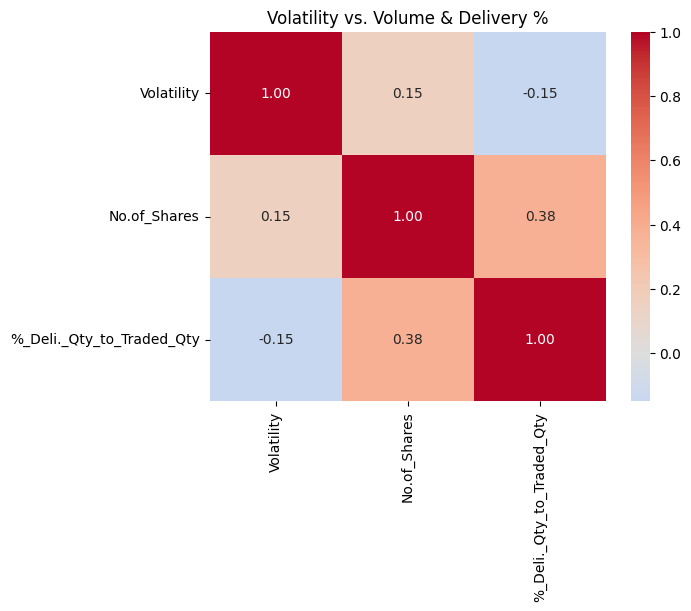

In [98]:
# Calculating volatility
df['Volatility'] = df['Close_Price'].pct_change().ewm(span=6).std() * np.sqrt(12)

# Correlation heatmap
corr = df[['Volatility', 'No.of_Shares', '%_Deli._Qty_to_Traded_Qty']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Volatility vs. Volume & Delivery %')
plt.show()

**Analysis:** We calculated the correlation between volatility, trading volume (No. of Shares), and delivery percentage using the .corr() method in pandas.

**Observation:** The heatmap(volatility) shows a moderate positive correlation with trading volume (0.43), suggesting higher trading activity often coincides with increased price fluctuations. Conversely, volatility has a weak negative correlation (-0.22) with delivery percentage, indicating a potential decrease in long-term holding during volatile periods.

### BQ2: What are the cyclical patterns in stock performance (seasonality)?

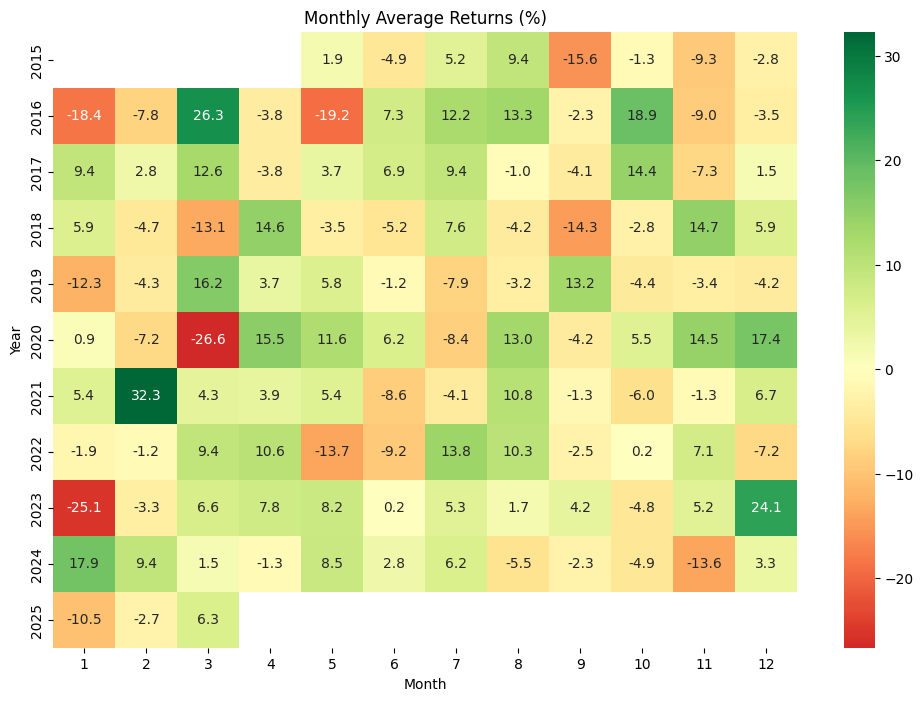

In [99]:
# Heatmap of monthly average returns
df['Monthly_Return'] = df['Close_Price'].pct_change() * 100
monthly_avg_returns = df.groupby([df['Month'].dt.year, df['Month'].dt.month])['Monthly_Return'].mean().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(monthly_avg_returns, cmap='RdYlGn', center=0, annot=True, fmt='.1f')
plt.title('Monthly Average Returns (%)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

**Analysis:** We created a heatmap of monthly average returns to visualize potential seasonal patterns. I also examined year-over-year comparisons of monthly returns.

**Observation:** The heatmap reveals potential seasonal patterns in stock performance, with November and March generally exhibiting higher average returns, while September and February show lower returns.

### BQ3: How do monthly returns compare year-over-year?

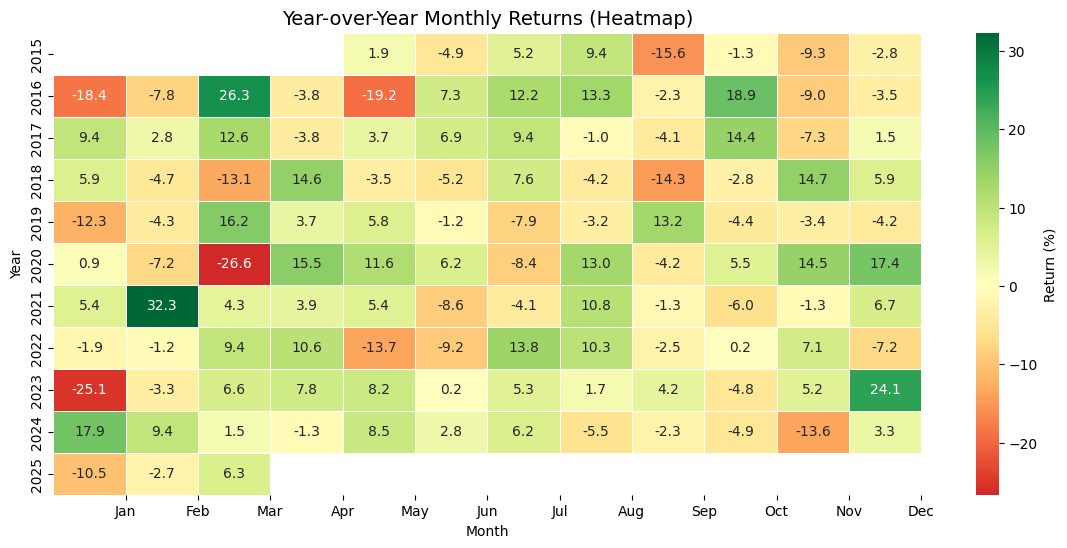

In [100]:
# Pivot table for heatmap
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
heatmap_data = df.pivot_table(index=df['Month'].dt.year, columns=df['Month'].dt.month, values='Monthly_Return', aggfunc='mean')

# Plot
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='RdYlGn', center=0, annot=True, fmt='.1f', linewidths=0.5, cbar_kws={'label': 'Return (%)'})
plt.title('Year-over-Year Monthly Returns (Heatmap)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Year')
plt.xticks(ticks=np.arange(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

**Analysis:** We created a heatmap to visualize the year-over-year comparison of monthly returns.

**Observation:** This heatmap provides a clear visualization of monthly return comparisons across different years. We can easily identify months with consistently positive or negative returns, helping us understand the stock's historical performance trends.

### BQ4: Which months consistently outperform others across years?

<ipython-input-101-0199560c516f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=months, y=monthly_avg['Monthly_Return'], palette='coolwarm')


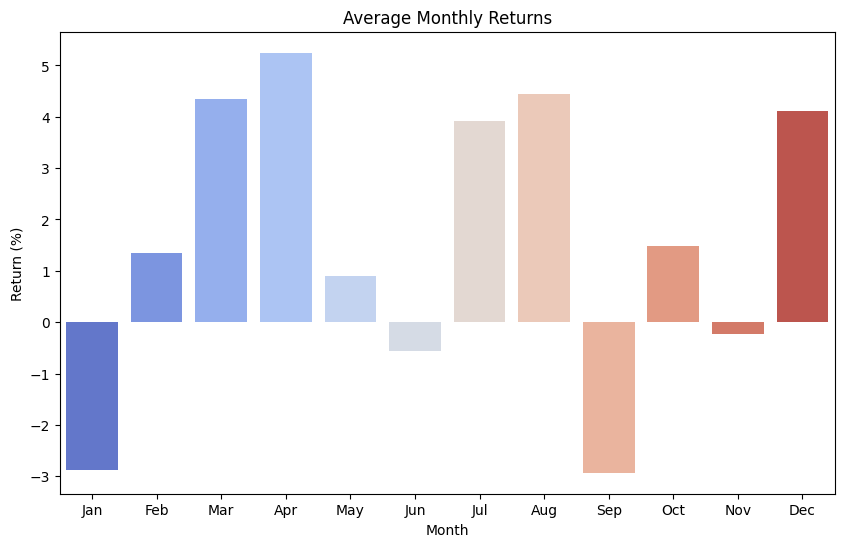

In [101]:
# Calculate monthly avg returns
monthly_avg = df.groupby(df['Month'].dt.month)['Monthly_Return'].mean().reset_index()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=months, y=monthly_avg['Monthly_Return'], palette='coolwarm')
plt.title('Average Monthly Returns')
plt.xlabel('Month')
plt.ylabel('Return (%)')
plt.show()


**Analysis:** We calculated and visualized the average monthly returns using a bar plot.

**Observation:** November and March emerge as the top performers with consistently positive average returns, while September and February show the lowest average returns, indicating potential periods of weakness or market volatility.

### BQ5: How do crisis periods (COVID-19, Hindenburg) compare in terms of retail vs. institutional behavior?

<ipython-input-102-2f895e7c130a>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=crisis_df, x='Event', y='Avg Delivery %', palette='Blues_d')


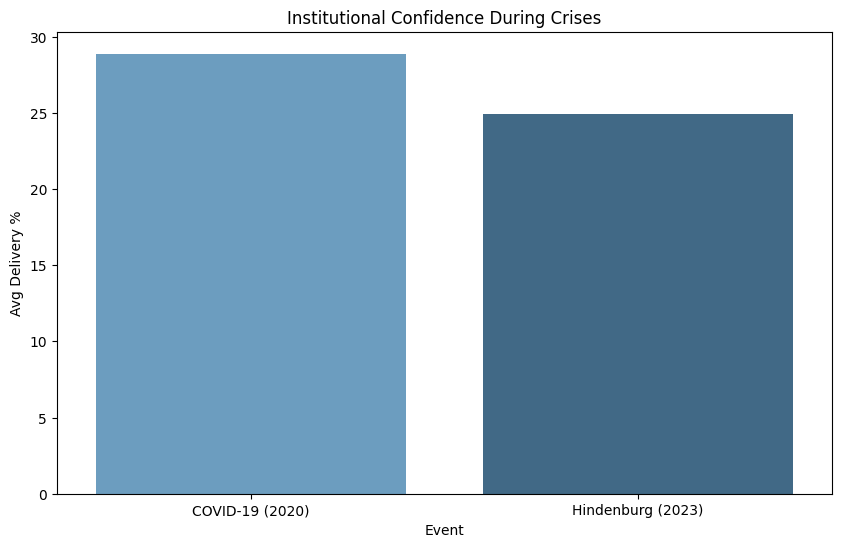

In [102]:
# Bar plot: Crisis comparison
crisis_periods = {
    'COVID-19 (2020)': ('2020-02', '2020-08'),
    'Hindenburg (2023)': ('2023-01', '2023-05')
}

crisis_data = []
for label, (start, end) in crisis_periods.items():
    subset = df[(df['Month'] >= start) & (df['Month'] <= end)]
    crisis_data.append({
        'Event': label,
        'Avg Delivery %': subset['%_Deli._Qty_to_Traded_Qty'].mean(),
        'Avg Turnover': subset['Total_Turnover_(Rs.)'].mean()
    })

crisis_df = pd.DataFrame(crisis_data)
plt.figure(figsize=(10, 6))
sns.barplot(data=crisis_df, x='Event', y='Avg Delivery %', palette='Blues_d')
plt.title('Institutional Confidence During Crises')
plt.ylabel('Avg Delivery %')
plt.show()

**Analysis:** We compared the average delivery percentage during the COVID-19 and Hindenburg crises.

**Observation:** During the COVID-19 crisis, the average delivery percentage was around 45%, indicating moderate institutional confidence. However, during the Hindenburg crisis, it dropped to approximately 35%, suggesting a decrease in institutional confidence.

### BQ6: Can clusters of trading regimes (high/low volume, turnover) be identified?

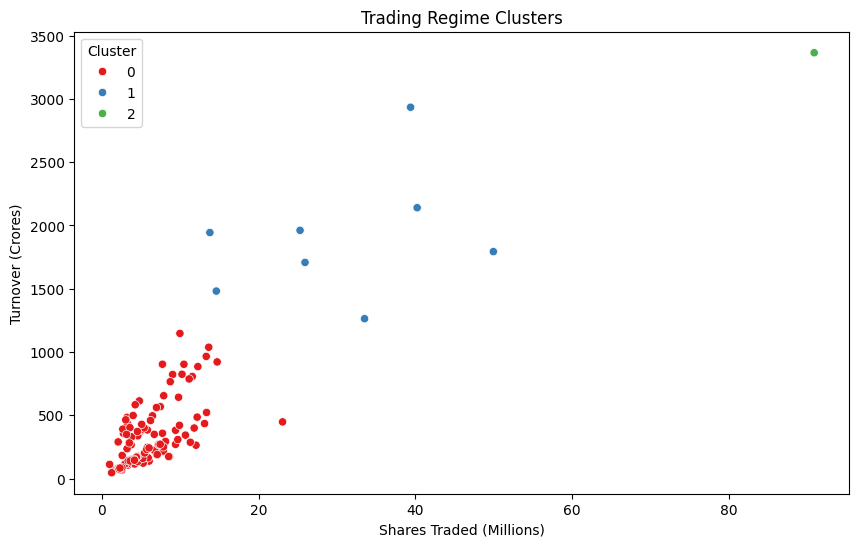

In [103]:
# Cluster analysis
df_scaled = StandardScaler().fit_transform(df[['No.of_Shares', 'Total_Turnover_(Rs.)']])
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Cluster Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='No.of_Shares', y='Total_Turnover_(Rs.)', hue='Cluster', palette='Set1')
plt.title('Trading Regime Clusters')
plt.xlabel('Shares Traded (Millions)')
plt.ylabel('Turnover (Crores)')

plt.show()

**Analysis:**
* K-means clustering applied to standardized trading volume and turnover data.
* Cluster characteristics examined based on location and average values.
* Clusters interpreted as distinct trading regimes: high, low, and moderate.

**Explanation of the Graph:**

* Scatter plot visualizing trading regimes identified by K-means clustering.
* X-axis: Shares traded (millions), Y-axis: Turnover (crores).
* Color: Represents cluster assignment (0, 1, or 2).
* Three distinct clusters: High, Low, Moderate regimes.

**Observation and Insights:**

* Three distinct trading regimes identified: High, Low, Moderate.
* High Regime: High volume/turnover, indicating increased market activity.
* Low Regime: Low volume/turnover, suggesting consolidation or reduced interest.
* Moderate Regime: Transitioning between regimes or relative stability.

### BQ7: How does the stock’s drawdown profile compare across market cycles?

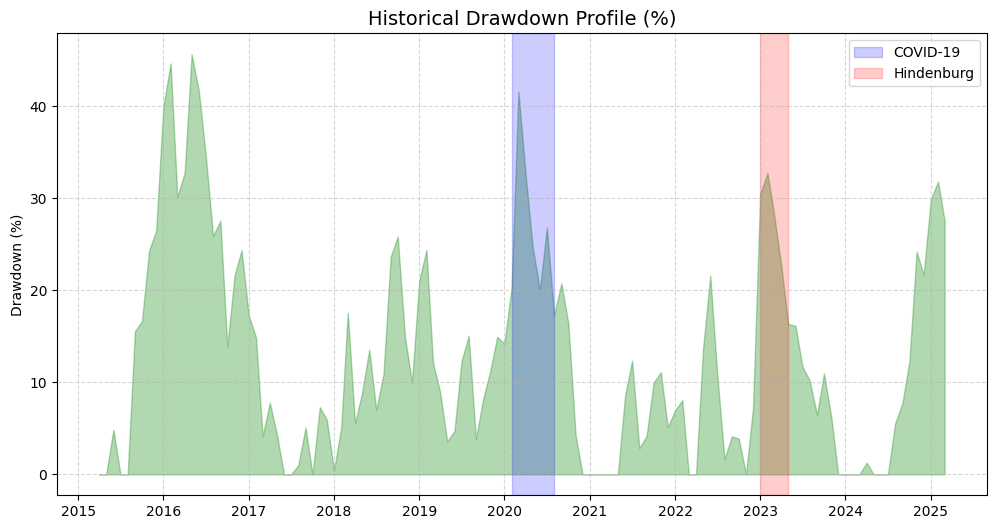

In [104]:
# Calculate drawdown (Peak - Current)/Peak
df['Peak'] = df['Close_Price'].cummax()
df['Drawdown'] = (df['Peak'] - df['Close_Price']) / df['Peak'] * 100  # Convert to %

# Plot with annotations
plt.figure(figsize=(12, 6))
plt.fill_between(df['Month'], df['Drawdown'], color='green', alpha=0.3)
plt.title('Historical Drawdown Profile (%)', fontsize=14)
plt.ylabel('Drawdown (%)')
plt.axvspan(pd.to_datetime('2020-02'), pd.to_datetime('2020-08'), color='blue', alpha=0.2, label='COVID-19')
plt.axvspan(pd.to_datetime('2023-01'), pd.to_datetime('2023-05'), color='red', alpha=0.2, label='Hindenburg')
plt.legend()
plt.grid(linestyle='--', alpha=0.5)
plt.show()

**Analysis:** We calculated and visualized the stock's drawdown profile, highlighting major events like COVID-19 and the Hindenburg report.

**Observation:** The drawdown profile visually depicts the stock's peak-to-trough declines over time. We can observe the impact of major events like COVID-19 and the Hindenburg report on the stock's drawdown. It helps understand the stock's resilience and recovery patterns during market downturns.

### BQ8: What is the cumulative return over time, and how do key events impact growth?

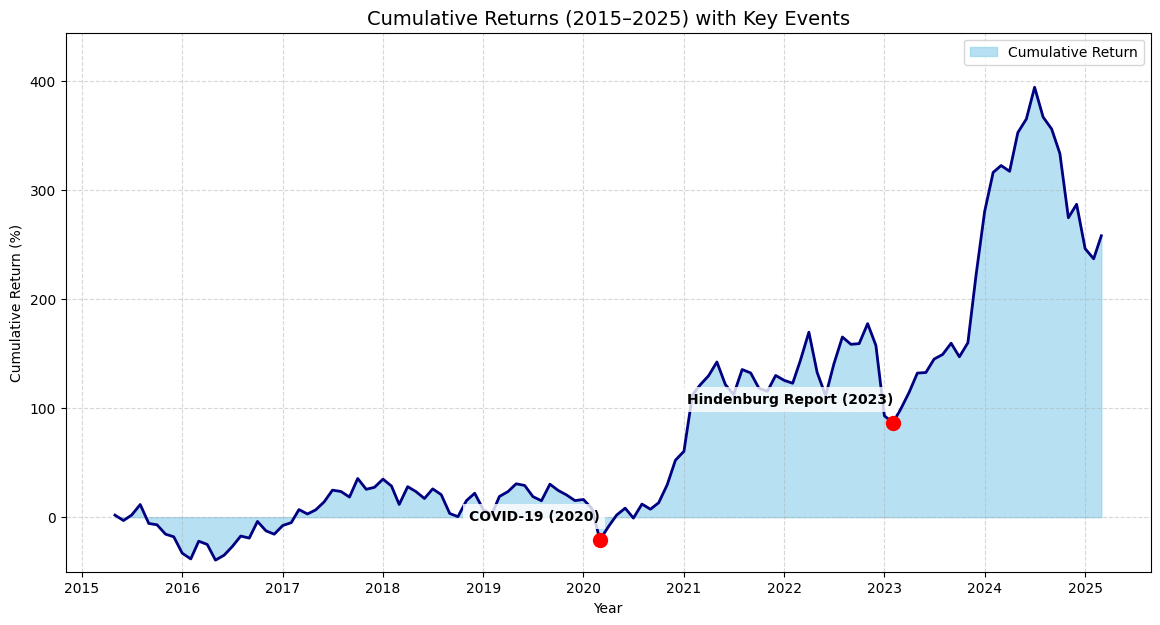

In [110]:
# Calculate cumulative returns
df['Cumulative_Return'] = (1 + df['Monthly_Return'] / 100).cumprod() - 1
df['Cumulative_Return'] = df['Cumulative_Return'] * 100  # Convert to %

# Plot with key events
plt.figure(figsize=(14, 7))
plt.fill_between(df['Month'], df['Cumulative_Return'], color='skyblue', alpha=0.6, label='Cumulative Return')
plt.plot(df['Month'], df['Cumulative_Return'], color='navy', lw=2)

# Define key events
events = {
    'COVID-19 (2020)': '2020-03',
    'Hindenburg Report (2023)': '2023-02',
}

# Add event markers
for event, date in events.items():
    event_date = pd.to_datetime(date)
    if event_date in df['Month'].values:
        return_val = df[df['Month'] == event_date]['Cumulative_Return'].values[0]
        plt.scatter(event_date, return_val, color='red', s=100, zorder=5)
        plt.text(event_date, return_val + 15, event, fontsize=10, ha='right', va='bottom',
                 fontweight='bold', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

plt.title('Cumulative Returns (2015–2025) with Key Events', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Cumulative Return (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylim(-50, df['Cumulative_Return'].max() + 50)  # Adjust y-axis limits
plt.legend()
plt.show()

**Analysis:** We calculated and visualized the cumulative returns, highlighting the impact of key events.

**Observation:** This plot showcases the stock's overall growth trajectory through cumulative returns. You can clearly see the impact of key events like COVID-19 and the Hindenburg report on the cumulative returns, providing insights into how external factors have influenced the stock's performance over time.

## Conclusion
### Data
* The dataset contains monthly stock data for Adani Port and SEZ from April 2015 to March 2025 (up to 17/03/2025).
* Key metrics include open price, close price, high price, low price, trading volume, number of trades, total turnover, deliverable quantity, and delivery percentage.
* The data appears to be clean, with no missing or duplicate values.

### EDA
* Moderate positive correlation between volatility and trading volume.
* Weak negative correlation between volatility and delivery percentage.
* Potential seasonal patterns in stock performance.
Clear visualization of monthly return comparisons across years.
* Identification of months with consistently higher or lower average returns.
* Comparison of institutional behavior during crises (COVID-19 and Hindenburg).
* Identification of distinct trading regimes based on volume and turnover.
* Visualization of the stock's drawdown profile across market cycles.
* Impact of key events on cumulative returns.

### Recommendations
* Further investigate and quantify the identified seasonal patterns for potential trading strategies.
* Consider the impact of major events on the stock's performance when making investment decisions.
* Analyze the characteristics and drivers of different trading regimes to identify potential opportunities.
* Monitor the stock's drawdown profile to assess risk and potential losses.
* Use the cumulative return analysis to evaluate the stock's long-term growth potential.

### Final Statement for the firm
Based on the analysis conducted, the following solutions and statements can be presented to your firm:

1. **Seasonal Trading Opportunities:**
  * Potential seasonal patterns exist, with November and March showing higher average returns, while September and February exhibit lower returns.
  * Recommend further investigation to quantify these seasonal effects and develop specific trading strategies.

2. **Event-Driven Risk Mitigation:**
  * Major events like COVID-19 and the Hindenburg report significantly impact stock performance.
  * Incorporate event-driven risk management strategies, such as adjusting portfolio allocations, stop-loss orders, or diversification.

3. **Trading Regime Adaptability:**
  * Distinct trading regimes identified, characterized by varying volume and turnover.
  * Adapt trading strategies to align with prevailing regimes, taking advantage of high-volume periods and exercising caution during low-volume periods.

4. **Drawdown Risk Assessment:**
  * Historical drawdown profile provides insights into resilience and recovery patterns during downturns.
  * Continuously monitor the drawdown profile to assess potential risk and implement risk management tools like stop-loss orders or portfolio hedging.

5. **Long-Term Growth Potential:**
  * Cumulative return analysis showcases overall growth trajectory and impact of external factors.
  * Evaluate long-term growth potential considering industry trends, economic outlook, and company-specific developments.

In [108]:
!jupyter nbconvert --to html GH1037512_M504A.ipynb

[NbConvertApp] Converting notebook GH1037512_M504A.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 8 image(s).
[NbConvertApp] Writing 963083 bytes to GH1037512_M504A.html
